## 1. Importing Libraries


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve, auc, confusion_matrix, precision_recall_curve,classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
import numpy as np 

## 2. Loading and Exploring the Data

In [2]:
df = pd.read_csv('data/framingham.csv')

In [39]:
# df.info()
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df['male'].value_counts()
df['currentSmoker'].value_counts()

currentSmoker
0    2144
1    2094
Name: count, dtype: int64

## 3. Data Cleaning and Preparation

In [5]:
df_simple = df.copy()
df_knn = df.copy()
df_iter = df.copy()

In [6]:
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

In [7]:
simple_imputer = SimpleImputer(strategy='median')

df_simple.loc[:, columns_with_nan] = simple_imputer.fit_transform(df_simple[columns_with_nan].values)

In [8]:
knn_imputer= KNNImputer(n_neighbors=10,metric='nan_euclidean',weights='uniform')

df_knn.loc[:, :] = knn_imputer.fit_transform(df_knn.values)

In [9]:
iter_imputer= IterativeImputer()

df_iter.loc[:, :] = iter_imputer.fit_transform(df_iter.values)

## 4. Model Building and Training


In [10]:
df.dropna(inplace=True)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='diabetes'),df['diabetes'],test_size=0.25,random_state=0)
x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(df_simple.drop(columns='diabetes'),df_simple['diabetes'],test_size=0.25,random_state=0)
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(df_knn.drop(columns='diabetes'),df_knn['diabetes'],test_size=0.25,random_state=0)

x_train_iter, x_test_iter, y_train_iter, y_test_iter = train_test_split(df_iter.drop(columns='diabetes'),df_iter['diabetes'],test_size=0.25,random_state=0)


### Liblinear model - balanced

In [12]:
model_1 = LogisticRegression(solver='liblinear',class_weight='balanced') # With newton-cg is the same result
model_1.fit(x_train,y_train)
predictions_1 = model_1.predict(x_test)

# If I reduce the tol, the model adapt better to the train_data but it's overfitting, so tol per default is ok

In [13]:
print(classification_report(y_test,predictions_1))

print('Confusion Matrix:\n', confusion_matrix(y_test,predictions_1) )

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       896
           1       0.16      0.67      0.26        18

    accuracy                           0.93       914
   macro avg       0.58      0.80      0.61       914
weighted avg       0.98      0.93      0.95       914

Confusion Matrix:
 [[834  62]
 [  6  12]]


#### Using Simple Iterator

In [14]:
model_1_simple = LogisticRegression(solver='liblinear',class_weight='balanced') # With newton-cg is the same result
model_1_simple.fit(x_train_simple,y_train_simple)
predictions_1_simple = model_1_simple.predict(x_test_simple)

# If I reduce the tol, the model adapt better to the train_data but it's overfitting, so tol per default is ok

In [15]:
print(classification_report(y_test_simple,predictions_1_simple))

print('Confusion Matrix:\n', confusion_matrix(y_test_simple,predictions_1_simple) )

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1030
           1       0.22      0.70      0.34        30

    accuracy                           0.92      1060
   macro avg       0.61      0.81      0.65      1060
weighted avg       0.97      0.92      0.94      1060

Confusion Matrix:
 [[956  74]
 [  9  21]]


#### Using KNN Iterator

In [16]:
model_1_knn = LogisticRegression(solver='liblinear',class_weight='balanced') # With newton-cg is the same result
model_1_knn.fit(x_train_knn,y_train_knn)
predictions_1_knn = model_1_knn.predict(x_test_knn)

In [17]:
print(classification_report(y_test_knn,predictions_1_knn))

print('Confusion Matrix:\n', confusion_matrix(y_test_knn,predictions_1_knn) )

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1030
           1       0.21      0.70      0.32        30

    accuracy                           0.92      1060
   macro avg       0.60      0.81      0.64      1060
weighted avg       0.97      0.92      0.94      1060

Confusion Matrix:
 [[949  81]
 [  9  21]]


#### Using Iterative Iterator

In [18]:
model_1_iter = LogisticRegression(solver='liblinear',class_weight='balanced')
model_1_iter.fit(x_train_iter,y_train_iter)
predictions_1_iter = model_1_iter.predict(x_test_iter)

In [19]:
print(classification_report(y_test_iter,predictions_1_iter))

print('Confusion Matrix:\n', confusion_matrix(y_test_iter,predictions_1_iter) )

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1030
           1       0.24      0.77      0.37        30

    accuracy                           0.93      1060
   macro avg       0.62      0.85      0.67      1060
weighted avg       0.97      0.93      0.94      1060

Confusion Matrix:
 [[959  71]
 [  7  23]]


### Liblinear model

In [20]:
model_2 = LogisticRegression(solver='liblinear') # With newton-cg is the same result
model_2.fit(x_train,y_train)
predictions_2 = model_2.predict(x_test)

# If I reduce the tol, the model adapt better to the train_data but it's overfitting, so tol per default is ok

In [21]:
print(classification_report(y_test,predictions_2))

print('Confusion Matrix:\n', confusion_matrix(y_test,predictions_2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       896
           1       0.75      0.50      0.60        18

    accuracy                           0.99       914
   macro avg       0.87      0.75      0.80       914
weighted avg       0.99      0.99      0.99       914

Confusion Matrix:
 [[893   3]
 [  9   9]]


#### Using Simple Iterator

In [22]:
model_2_simple = LogisticRegression(solver='liblinear') # With newton-cg is the same result
model_2_simple.fit(x_train_simple,y_train_simple)
predictions_2_simple = model_2_simple.predict(x_test_simple)

# If I reduce the tol, the model adapt better to the train_data but it's overfitting, so tol per default is ok

In [23]:
print(classification_report(y_test_simple,predictions_2_simple))

print('Confusion Matrix:\n', confusion_matrix(y_test_simple,predictions_2_simple) )

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1030
           1       0.82      0.47      0.60        30

    accuracy                           0.98      1060
   macro avg       0.90      0.73      0.79      1060
weighted avg       0.98      0.98      0.98      1060

Confusion Matrix:
 [[1027    3]
 [  16   14]]


#### Using KNN Iterator

In [24]:
model_2_knn = LogisticRegression(solver='liblinear') # With newton-cg is the same result
model_2_knn.fit(x_train_knn,y_train_knn)
predictions_2_knn = model_2_knn.predict(x_test_knn)

In [25]:
print(classification_report(y_test_knn,predictions_2_knn))

print('Confusion Matrix:\n', confusion_matrix(y_test_knn,predictions_2_knn) )

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1030
           1       0.82      0.47      0.60        30

    accuracy                           0.98      1060
   macro avg       0.90      0.73      0.79      1060
weighted avg       0.98      0.98      0.98      1060

Confusion Matrix:
 [[1027    3]
 [  16   14]]


#### Using Iterative Iterator

In [26]:
model_2_iter = LogisticRegression(solver='liblinear')
model_2_iter.fit(x_train_iter,y_train_iter)
predictions_2_iter = model_2_iter.predict(x_test_iter)

In [27]:
print(classification_report(y_test_iter,predictions_2_iter))

print('Confusion Matrix:\n', confusion_matrix(y_test_iter,predictions_2_iter) )

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1030
           1       0.84      0.53      0.65        30

    accuracy                           0.98      1060
   macro avg       0.91      0.77      0.82      1060
weighted avg       0.98      0.98      0.98      1060

Confusion Matrix:
 [[1027    3]
 [  14   16]]


## 5. Model Evaluation

### ROC Curve

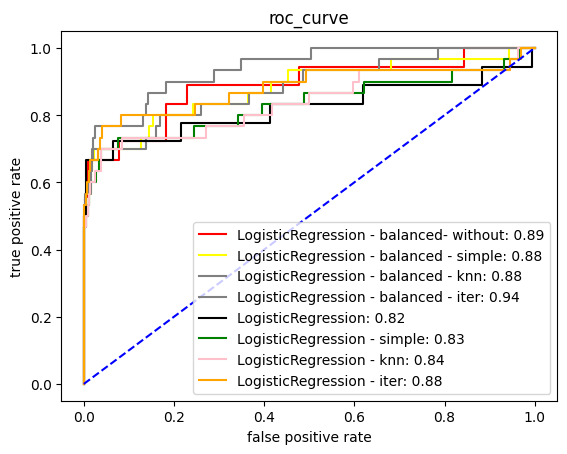

In [28]:
fpr_1, tpr_1, _ = roc_curve(y_test,model_1.predict_proba(x_test)[:, 1])
fpr_1_simple, tpr_1_simple, _ = roc_curve(y_test_simple,model_1_simple.predict_proba(x_test_simple)[:, 1])
fpr_1_knn, tpr_1_knn, _ = roc_curve(y_test_knn,model_1_knn.predict_proba(x_test_knn)[:, 1])
fpr_1_iter, tpr_1_iter, _ = roc_curve(y_test_iter,model_1_iter.predict_proba(x_test_iter)[:, 1])

fpr_2, tpr_2, _ = roc_curve(y_test,model_2.predict_proba(x_test)[:, 1])
fpr_2_simple, tpr_2_simple, _ = roc_curve(y_test_simple,model_2_simple.predict_proba(x_test_simple)[:, 1])
fpr_2_knn, tpr_2_knn, _ = roc_curve(y_test_knn,model_2_knn.predict_proba(x_test_knn)[:, 1])
fpr_2_iter, tpr_2_iter, _ = roc_curve(y_test_iter,model_2_iter.predict_proba(x_test_iter)[:, 1])


area_1 = auc(fpr_1, tpr_1)
area_1_simple = auc(fpr_1_simple,tpr_1_simple)
area_1_knn = auc(fpr_1_knn,tpr_1_knn)
area_1_iter = auc(fpr_1_iter,tpr_1_iter)

area_2 = auc(fpr_2,tpr_2)
area_2_simple = auc(fpr_2_simple,tpr_2_simple)
area_2_knn = auc(fpr_2_knn,tpr_2_knn)
area_2_iter = auc(fpr_2_iter,tpr_2_iter)


plt.figure()
plt.plot(fpr_1, tpr_1,color='red',label=f'{model_1.__class__.__name__} - balanced- without: {area_1:.2f}')
plt.plot(fpr_1_simple,tpr_1_simple,color='yellow',label=f'{model_1_simple.__class__.__name__} - balanced - simple: {area_1_simple:.2f}')
plt.plot(fpr_1_knn,tpr_1_knn,color='gray',label=f'{model_1_knn.__class__.__name__} - balanced - knn: {area_1_knn:.2f}')
plt.plot(fpr_1_iter,tpr_1_iter,color='gray',label=f'{model_1_iter.__class__.__name__} - balanced - iter: {area_1_iter:.2f}')

plt.plot(fpr_2,tpr_2,color='black',label=f'{model_2.__class__.__name__}: {area_2:.2f}')
plt.plot(fpr_2_simple,tpr_2_simple,color='green',label=f'{model_2_simple.__class__.__name__} - simple: {area_2_simple:.2f}')
plt.plot(fpr_2_knn,tpr_2_knn,color='pink',label=f'{model_2_knn.__class__.__name__} - knn: {area_2_knn:.2f}')
plt.plot(fpr_2_iter,tpr_2_iter,color='orange',label=f'{model_2_iter.__class__.__name__} - iter: {area_2_iter:.2f}')


plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc_curve')
plt.legend()
plt.show()


### Precision-Recall Curve

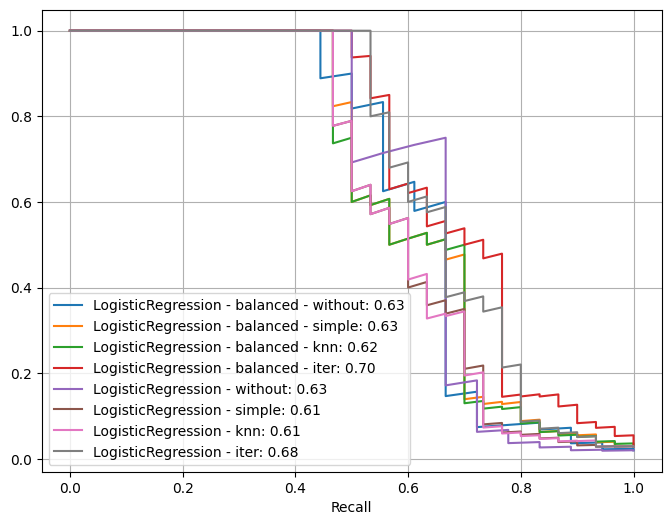

In [29]:
prec_model_1, recall_model_1, _ = precision_recall_curve(y_test, model_1.predict_proba(x_test)[:, 1])
prec_model_1_simple, recall_model_1_simple, _ = precision_recall_curve(y_test_simple, model_1_simple.predict_proba(x_test_simple)[:, 1])
prec_model_1_knn, recall_model_1_knn, _ = precision_recall_curve(y_test_knn, model_1_knn.predict_proba(x_test_knn)[:, 1])
prec_model_1_iter, recall_model_1_iter, _ = precision_recall_curve(y_test_iter, model_1_iter.predict_proba(x_test_iter)[:, 1])


prec_model_2, recall_model_2, _ = precision_recall_curve(y_test, model_2.predict_proba(x_test)[:, 1])
prec_model_2_simple, recall_model_2_simple, _ = precision_recall_curve(y_test_simple, model_2_simple.predict_proba(x_test_simple)[:, 1])
prec_model_2_knn, recall_model_2_knn, _ = precision_recall_curve(y_test_knn, model_2_knn.predict_proba(x_test_knn)[:, 1])
prec_model_2_iter, recall_model_2_iter, _ = precision_recall_curve(y_test_iter, model_2_iter.predict_proba(x_test_iter)[:, 1])

auc_model_1 = auc(recall_model_1, prec_model_1)
auc_model_1_simple = auc(recall_model_1_simple, prec_model_1_simple)
auc_model_1_knn = auc(recall_model_1_knn, prec_model_1_knn)
auc_model_1_iter = auc(recall_model_1_iter, prec_model_1_iter)

auc_model_2 = auc(recall_model_2, prec_model_1)
auc_model_2_simple = auc(recall_model_2_simple, prec_model_2_simple)
auc_model_2_knn = auc(recall_model_2_knn, prec_model_2_knn)
auc_model_2_iter = auc(recall_model_2_iter, prec_model_2_iter)

plt.figure(figsize=(8, 6))
plt.plot(recall_model_1, prec_model_1,label=f'{model_1.__class__.__name__} - balanced - without: {auc_model_1:.2f}')
plt.plot(recall_model_1_simple, prec_model_1_simple,label=f'{model_1_simple.__class__.__name__} - balanced - simple: {auc_model_1_simple:.2f}')
plt.plot(recall_model_1_knn, prec_model_1_knn,label=f'{model_1_knn.__class__.__name__} - balanced - knn: {auc_model_1_knn:.2f}')
plt.plot(recall_model_1_iter, prec_model_1_iter,label=f'{model_1_iter.__class__.__name__} - balanced - iter: {auc_model_1_iter:.2f}')

plt.plot(recall_model_2, prec_model_2,label=f'{model_2.__class__.__name__} - without: {auc_model_2:.2f}')
plt.plot(recall_model_2_simple, prec_model_2_simple,label=f'{model_2_simple.__class__.__name__} - simple: {auc_model_2_simple:.2f}')
plt.plot(recall_model_2_knn, prec_model_2_knn,label=f'{model_2_knn.__class__.__name__} - knn: {auc_model_2_knn:.2f}')
plt.plot(recall_model_2_iter, prec_model_2_iter,label=f'{model_2_iter.__class__.__name__} - iter: {auc_model_2_iter:.2f}')

plt.xlabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

## 6. Results

We can see that the best performance is obtained by the solver: `liblinear` with `balanced` classes, but before, the missing values ​​were processed with an iterative imputer, and this processing is the advantage to obtain these results compared to other types of processing.

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1030
           1       0.24      0.77      0.37        30

    accuracy                           0.93      1060
   macro avg       0.62      0.85      0.67      1060
weighted avg       0.97      0.93      0.94      1060



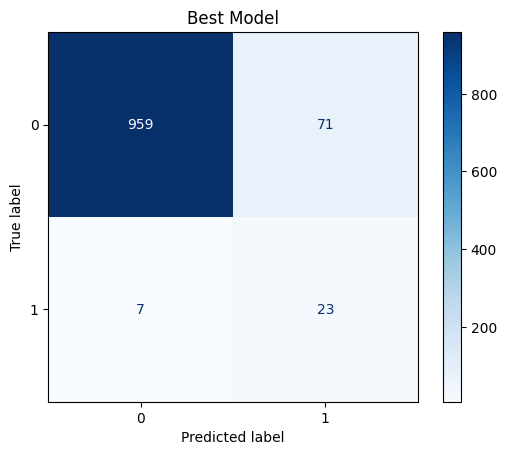

In [35]:
print(classification_report(y_test_iter,predictions_1_iter))

cm = confusion_matrix(y_test_iter,predictions_1_iter)

disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test_iter))
disp.plot(cmap='Blues')
plt.title('Best Model')
plt.show()